In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
# Random forest, svr, decision tree params adjust and theory randomforest
# testing many dataframe for each model
# eda for each solution

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training6.csv")
df.head()
corr=df.corr()

In [3]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,-0.011378,...,-0.242598,NaN,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060,NaN,1.000000
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,-0.225013,NaN,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,NaN,0.790982
GrLivArea,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,-0.009640,...,-0.121102,NaN,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239,NaN,0.708624
GarageCars,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,-0.038264,...,-0.197458,NaN,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164,NaN,0.640409
GarageArea,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,-0.018227,...,-0.218665,NaN,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714,NaN,0.623431
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,0.522396,0.104810,...,-0.212851,NaN,-0.032031,-0.055895,-0.047002,0.019569,-0.160222,0.266268,NaN,0.613581
1stFlrSF,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.281986,0.240379,0.342160,0.445863,0.097117,...,-0.198056,NaN,-0.030196,-0.037451,0.068107,0.021949,-0.158772,0.221037,NaN,0.605852
FullBath,0.131608,0.180424,0.126031,0.550600,-0.194149,0.468271,0.439046,0.275730,0.058543,-0.076444,...,-0.161352,NaN,-0.093473,-0.006193,0.016794,-0.003225,-0.110040,0.232767,NaN,0.560664
BsmtQual_Ex,-0.055495,0.210258,0.065639,0.470780,-0.151008,0.319394,0.286165,0.333908,0.271434,-0.042850,...,-0.286102,NaN,-0.052580,-0.015756,-0.027366,-0.035427,-0.221979,0.378613,NaN,0.553105
TotRmsAbvGrd,0.040380,0.320146,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280027,0.044316,-0.035227,...,-0.113335,NaN,-0.050332,-0.008639,0.059698,0.031347,-0.092644,0.142032,NaN,0.533723


In [4]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [5]:
model=RandomForestRegressor()

In [6]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [7]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [8]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,20043.903212,31401.437283,0.871446
1,11,19515.499521,30659.775086,0.877447
2,12,18940.648364,29703.571315,0.884972
3,13,18617.898856,29379.682335,0.887467
4,14,19054.261826,30077.730093,0.882056
...,...,...,...,...
105,115,18145.639007,29841.835483,0.883899
106,116,17863.397500,29511.244747,0.886457
107,117,17950.301952,29006.072169,0.890311
108,118,18011.452500,29466.527461,0.886801


In [9]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
72,82,17605.299486,28592.485014,0.893417
63,73,17610.335959,28506.105673,0.894060
31,41,17617.925753,28645.982993,0.893017
86,96,17664.286541,28621.660621,0.893199
47,57,17671.756884,28770.906725,0.892082
...,...,...,...,...
7,17,19056.423249,29493.432952,0.886594
5,15,19075.165211,29935.930636,0.883165
6,16,19326.836669,30097.940939,0.881897
1,11,19515.499521,30659.775086,0.877447


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


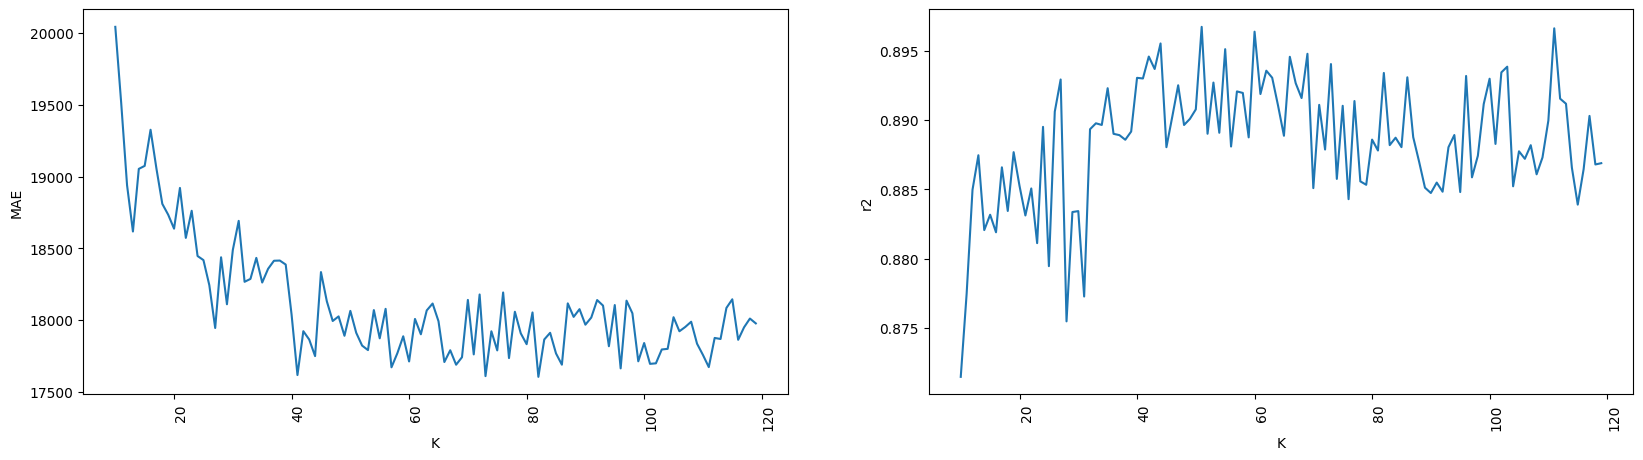

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [11]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               1.788113e+03
LotFrontage              4.847253e+02
LotArea                  9.955741e+07
OverallQual              1.911369e+00
OverallCond              1.237474e+00
                             ...     
SaleCondition_Family     1.351098e-02
SaleCondition_Normal     1.472490e-01
SaleCondition_Partial    7.828626e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [12]:
varr.loc[varr > 0.1].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

### 2.USING VarianceThreshold FROM SKLEARN

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

In [15]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,17547.935068,28304.228245,0.895555
1,101,17576.965205,28603.102989,0.893337
2,102,17816.158527,29577.271971,0.885948
3,103,17511.168116,28504.433376,0.894072
4,104,17745.721473,29022.248373,0.890188
...,...,...,...,...
395,495,17918.363870,28996.215027,0.890385
396,496,17381.372226,28667.511714,0.892856
397,497,17309.207568,28031.687118,0.897556
398,498,17309.324623,28872.659737,0.891317


In [16]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
118,218,17074.793596,27892.706035,0.898570
90,190,17118.496267,28782.152446,0.891998
123,223,17148.399110,28305.777836,0.895543
309,409,17153.148356,28529.503180,0.893886
369,469,17166.594349,27926.960765,0.898320
...,...,...,...,...
365,465,18058.475856,29632.953804,0.885518
103,203,18081.092158,29458.820832,0.886860
392,492,18087.323596,30522.897938,0.878539
230,330,18159.811370,29751.042154,0.884604


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


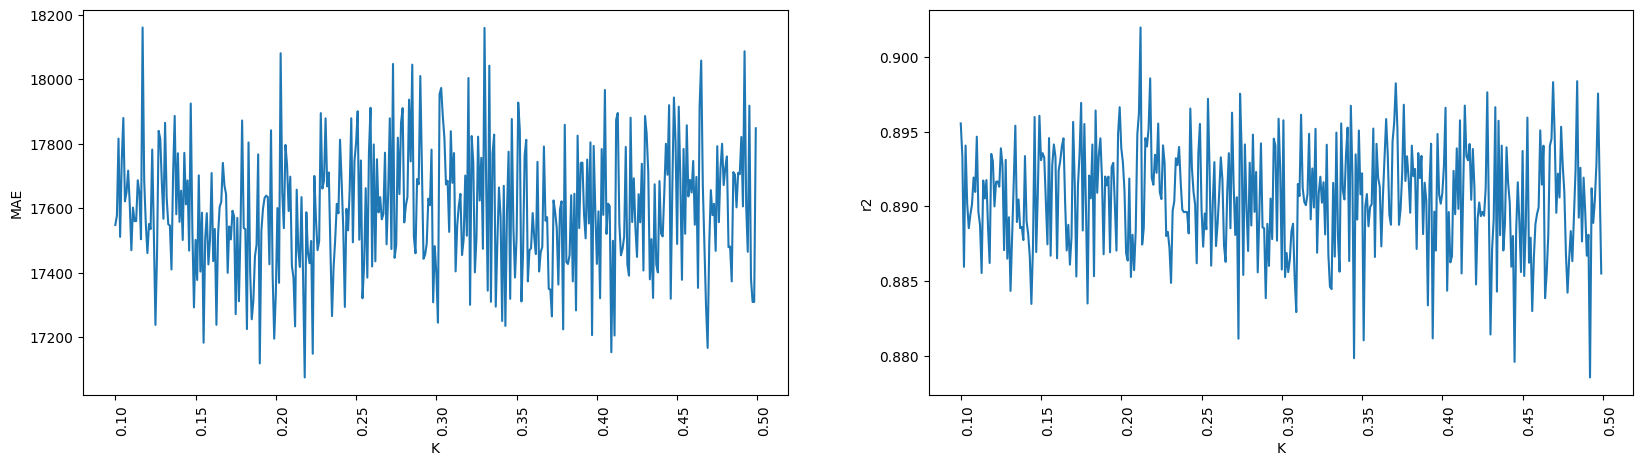

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


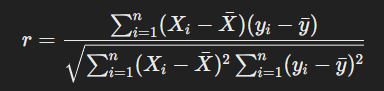

### Using numpy

In [18]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [19]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.7909816005838051


In [20]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['OverallQual', 0.7909816005838051],
 ['TotalBsmtSF', 0.6135805515591953],
 ['1stFlrSF', 0.6058521846919146],
 ['GrLivArea', 0.708624477612652],
 ['GarageCars', 0.640409197258352],
 ['GarageArea', 0.6234314389183616]]

### Using sklearn

In [21]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [22]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,20302.774451,31241.399373,0.872753
1,6,20017.870196,30711.361523,0.877034
2,7,19782.703266,30416.304346,0.879386
3,8,20162.845111,30861.443342,0.875829
4,9,19995.118072,30430.095139,0.879276
...,...,...,...,...
110,115,18129.584692,29525.504317,0.886347
111,116,17785.264041,28941.380111,0.890799
112,117,17897.096541,29425.616622,0.887115
113,118,17803.151884,28398.138637,0.894860


In [23]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
37,42,17444.592089,27981.232789,0.897925
109,114,17518.768356,28654.044744,0.892957
65,70,17563.623425,28173.774645,0.896515
50,55,17591.650890,28177.132403,0.896491
93,98,17597.113596,28906.734168,0.891061
...,...,...,...,...
2,7,19782.703266,30416.304346,0.879386
4,9,19995.118072,30430.095139,0.879276
1,6,20017.870196,30711.361523,0.877034
3,8,20162.845111,30861.443342,0.875829


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


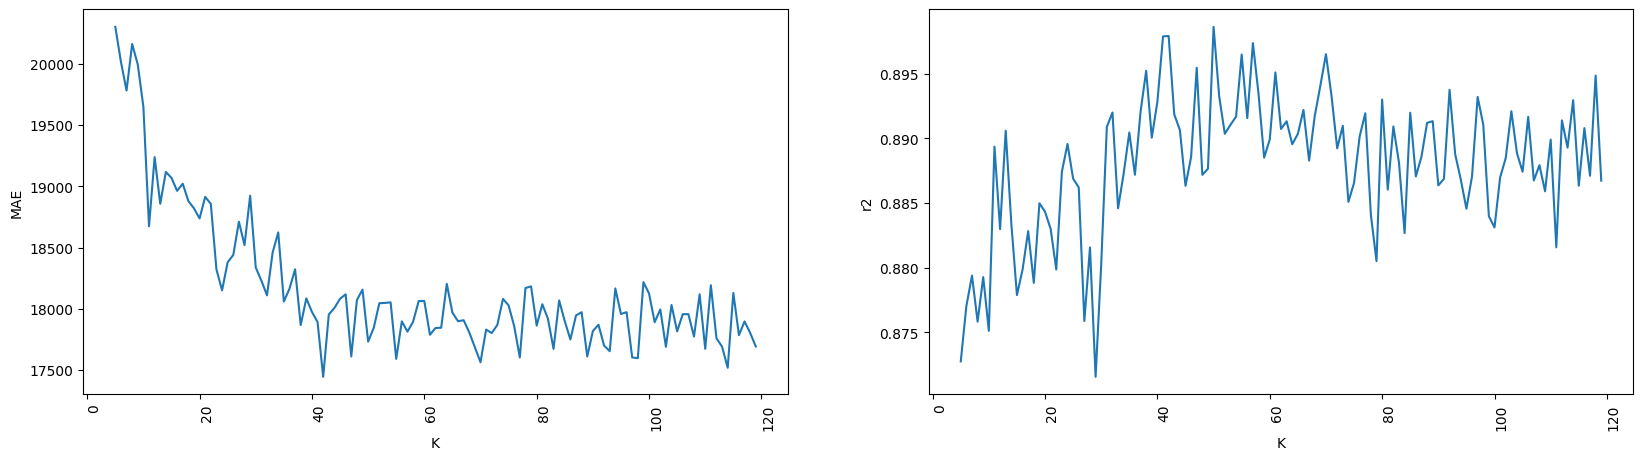

In [24]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

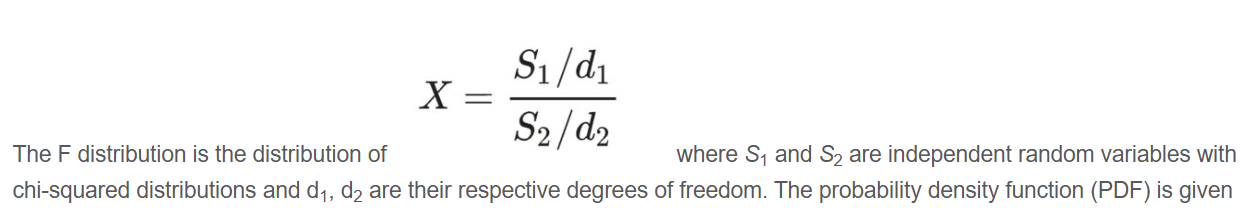

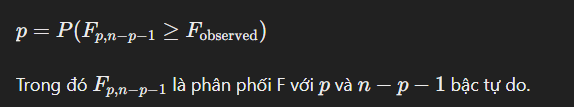

In [25]:
from sklearn.feature_selection import f_regression

In [26]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,20285.924626,31480.211603,0.870800
1,6,20391.672263,32084.926707,0.865789
2,7,20199.271742,31470.288739,0.870882
3,8,19761.016808,30581.583667,0.878071
4,9,19997.686210,30687.638156,0.877224
...,...,...,...,...
110,115,17807.868185,29020.046440,0.890205
111,116,18007.353767,28572.623767,0.893565
112,117,17754.047808,28580.894637,0.893503
113,118,17944.372192,29025.170309,0.890166


In [27]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
95,100,17405.347945,27739.325419,0.899682
92,97,17416.539863,28264.340858,0.895849
93,98,17445.015137,28356.078273,0.895172
61,66,17508.793562,28228.016515,0.896116
78,83,17544.519041,27973.991966,0.897978
...,...,...,...,...
3,8,19761.016808,30581.583667,0.878071
4,9,19997.686210,30687.638156,0.877224
2,7,20199.271742,31470.288739,0.870882
0,5,20285.924626,31480.211603,0.870800


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


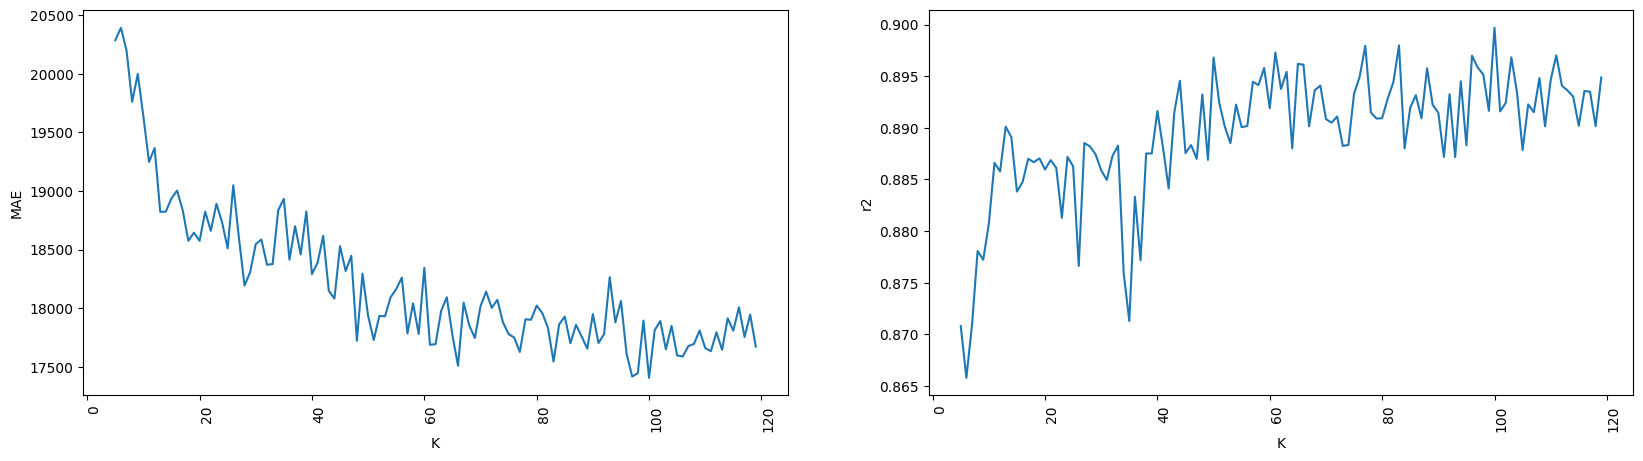

In [28]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

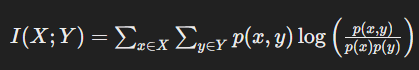

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

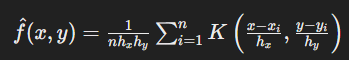

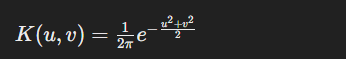

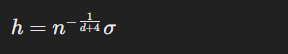

In [29]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,20331.281213,30739.013274,0.876813
1,6,19543.270435,29841.551887,0.883901
2,7,19461.981347,29698.088053,0.885014
3,8,19297.334268,30351.984525,0.879895
4,9,19397.959829,30311.070935,0.880219
...,...,...,...,...
110,115,17787.218390,29129.425080,0.889376
111,116,17621.651507,28957.510127,0.890678
112,117,17572.562329,29034.386205,0.890097
113,118,17494.474658,28759.786914,0.892166


In [32]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [33]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
97,102,17056.681507,27460.011155,0.901692
98,103,17095.782123,28136.422942,0.896789
78,83,17109.464486,27908.208442,0.898457
95,100,17141.437671,27494.979990,0.901442
86,91,17183.637671,27810.804311,0.899165
...,...,...,...,...
3,8,19297.334268,30351.984525,0.879895
4,9,19397.959829,30311.070935,0.880219
2,7,19461.981347,29698.088053,0.885014
1,6,19543.270435,29841.551887,0.883901


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_2816\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


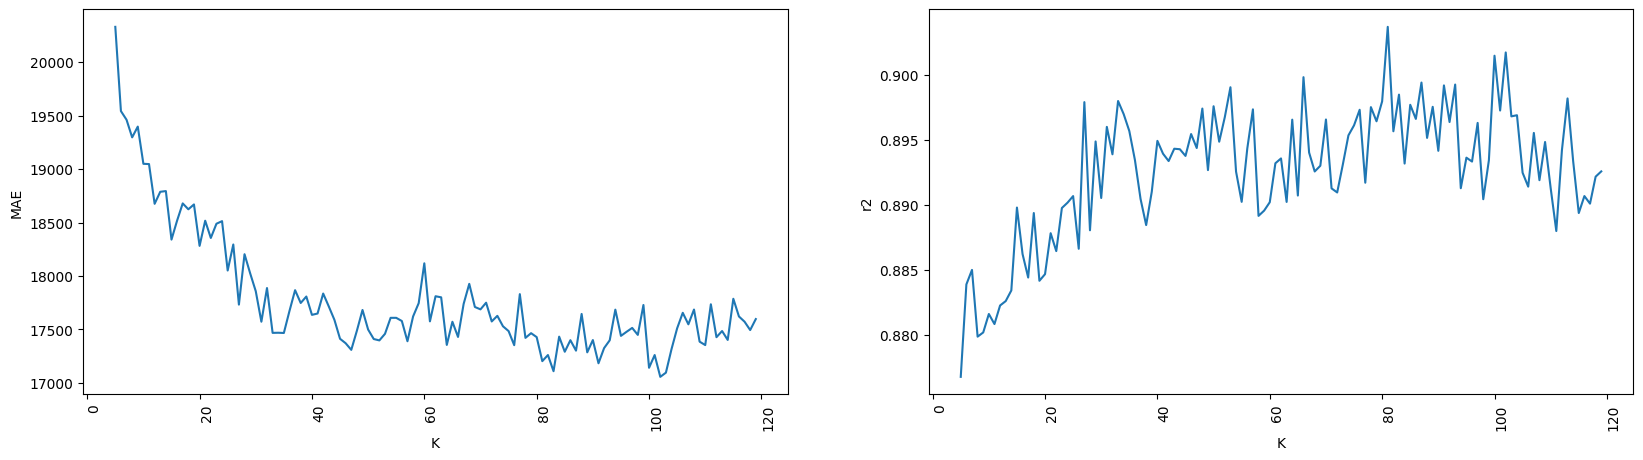

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [35]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,20302.774451,31241.399373,0.872753
1,6,20017.870196,30711.361523,0.877034
2,7,19782.703266,30416.304346,0.879386
3,8,20162.845111,30861.443342,0.875829
4,9,19995.118072,30430.095139,0.879276
...,...,...,...,...
110,115,18129.584692,29525.504317,0.886347
111,116,17785.264041,28941.380111,0.890799
112,117,17897.096541,29425.616622,0.887115
113,118,17803.151884,28398.138637,0.894860


In [36]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,20285.924626,31480.211603,0.870800
1,6,20391.672263,32084.926707,0.865789
2,7,20199.271742,31470.288739,0.870882
3,8,19761.016808,30581.583667,0.878071
4,9,19997.686210,30687.638156,0.877224
...,...,...,...,...
110,115,17807.868185,29020.046440,0.890205
111,116,18007.353767,28572.623767,0.893565
112,117,17754.047808,28580.894637,0.893503
113,118,17944.372192,29025.170309,0.890166


In [37]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,20331.281213,30739.013274,0.876813
1,6,19543.270435,29841.551887,0.883901
2,7,19461.981347,29698.088053,0.885014
3,8,19297.334268,30351.984525,0.879895
4,9,19397.959829,30311.070935,0.880219
...,...,...,...,...
110,115,17787.218390,29129.425080,0.889376
111,116,17621.651507,28957.510127,0.890678
112,117,17572.562329,29034.386205,0.890097
113,118,17494.474658,28759.786914,0.892166


In [38]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,20302.774451,31241.399373,0.872753,20285.924626,31480.211603,0.870800
1,6,20017.870196,30711.361523,0.877034,20391.672263,32084.926707,0.865789
2,7,19782.703266,30416.304346,0.879386,20199.271742,31470.288739,0.870882
3,8,20162.845111,30861.443342,0.875829,19761.016808,30581.583667,0.878071
4,9,19995.118072,30430.095139,0.879276,19997.686210,30687.638156,0.877224
...,...,...,...,...,...,...,...
110,115,18129.584692,29525.504317,0.886347,17807.868185,29020.046440,0.890205
111,116,17785.264041,28941.380111,0.890799,18007.353767,28572.623767,0.893565
112,117,17897.096541,29425.616622,0.887115,17754.047808,28580.894637,0.893503
113,118,17803.151884,28398.138637,0.894860,17944.372192,29025.170309,0.890166


In [39]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,20302.774451,31241.399373,0.872753,20285.924626,31480.211603,0.870800,20331.281213,30739.013274,0.876813
1,6,20017.870196,30711.361523,0.877034,20391.672263,32084.926707,0.865789,19543.270435,29841.551887,0.883901
2,7,19782.703266,30416.304346,0.879386,20199.271742,31470.288739,0.870882,19461.981347,29698.088053,0.885014
3,8,20162.845111,30861.443342,0.875829,19761.016808,30581.583667,0.878071,19297.334268,30351.984525,0.879895
4,9,19995.118072,30430.095139,0.879276,19997.686210,30687.638156,0.877224,19397.959829,30311.070935,0.880219
...,...,...,...,...,...,...,...,...,...,...
110,115,18129.584692,29525.504317,0.886347,17807.868185,29020.046440,0.890205,17787.218390,29129.425080,0.889376
111,116,17785.264041,28941.380111,0.890799,18007.353767,28572.623767,0.893565,17621.651507,28957.510127,0.890678
112,117,17897.096541,29425.616622,0.887115,17754.047808,28580.894637,0.893503,17572.562329,29034.386205,0.890097
113,118,17803.151884,28398.138637,0.894860,17944.372192,29025.170309,0.890166,17494.474658,28759.786914,0.892166


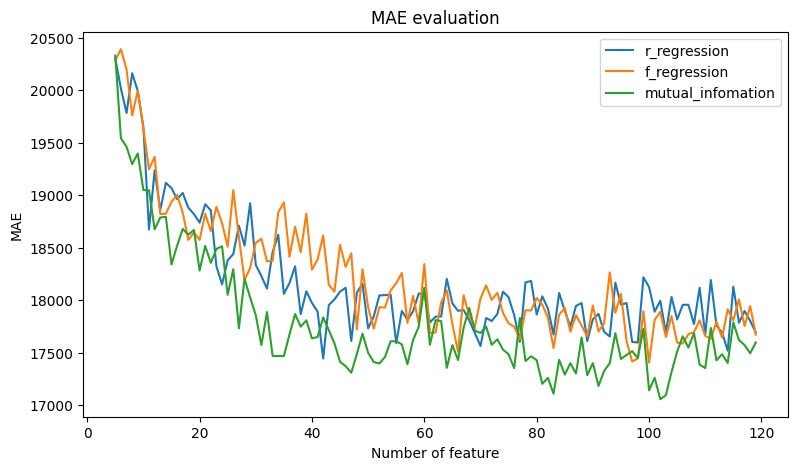

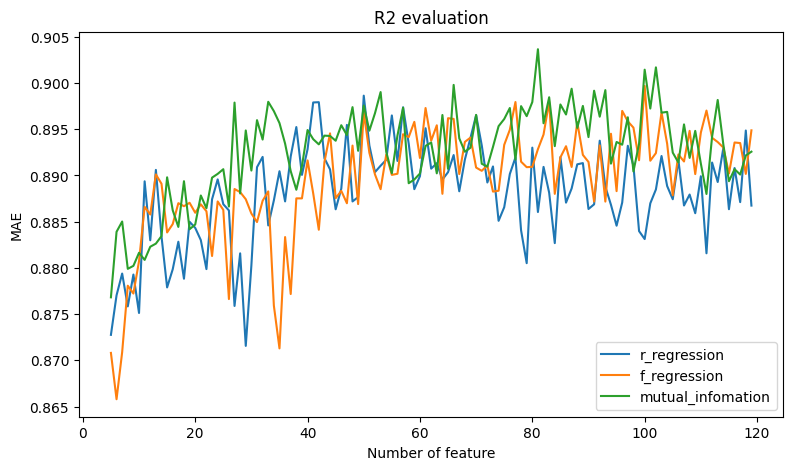

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()